In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

In [701]:
train_df=pd.read_csv("spaceship train.csv")
train_df


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [702]:
test_df=pd.read_csv("spaceship test.csv")
test_df



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [703]:
ID=test_df["PassengerId"]
ID

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [704]:
train_df.shape

(8693, 14)

In [705]:
test_df.shape

(4277, 13)

In [706]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [707]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


<Axes: xlabel='Transported', ylabel='count'>

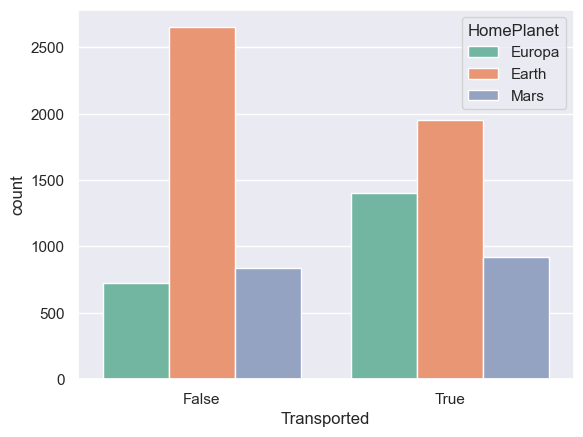

In [708]:
#HomePlanet
sns.countplot(x="Transported",hue="HomePlanet",data=train_df,palette="Set2")

<Axes: xlabel='Transported', ylabel='count'>

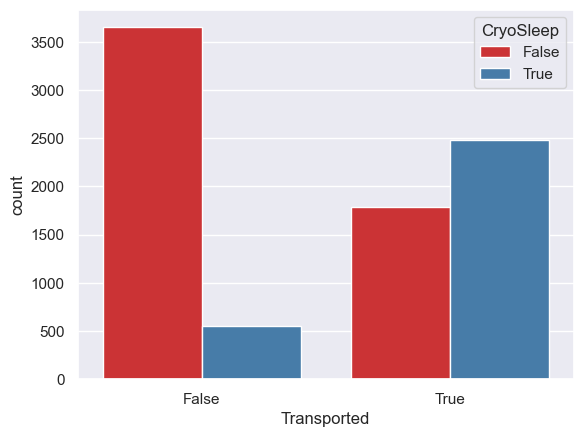

In [709]:
#CryoSleep
sns.countplot(x="Transported",hue="CryoSleep",data=train_df,palette="Set1")

In [710]:
# #CryoSleep
# sns.set()
# plt.hist(train_df[train_df["Transported"]==0].CryoSleep,color="red",alpha=0.3,label="Not Transported")
# plt.hist(train_df[train_df["Transported"]==1].CryoSleep,color="blue",alpha=0.3,label="Transported")
# plt.legend()
# plt.plot()

In [711]:
#Cabin
#sns.countplot(x="Transported",hue="Cabin",data=train_df,palette="Set3")

In [712]:
#Cabin
#

<Axes: xlabel='Transported', ylabel='count'>

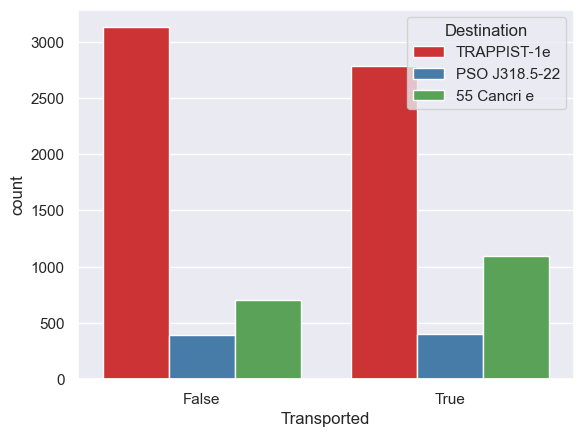

In [713]:
#Destination
sns.countplot(x="Transported",hue="Destination",data=train_df,palette="Set1")

[]

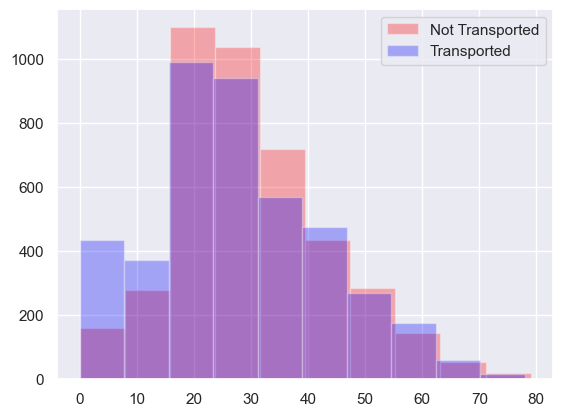

In [714]:
#Age
sns.set()
plt.hist(train_df[train_df["Transported"]==0].Age,color="red",alpha=0.3,label="Not Transported")
plt.hist(train_df[train_df["Transported"]==1].Age,color="blue",alpha=0.3,label="Transported")
plt.legend()
plt.plot()

<Axes: xlabel='Transported', ylabel='count'>

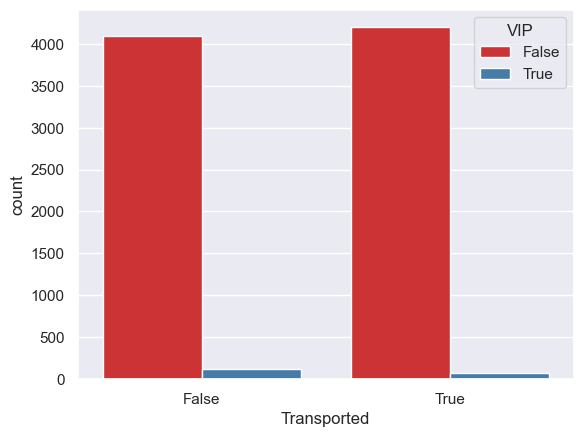

In [715]:
#VIP
sns.countplot(x="Transported",hue="VIP",data=train_df,palette="Set1")

In [716]:
#RoomService
#sns.countplot(x="Transported",hue="RoomService",data=train_df,palette="Set1")

In [717]:
#FoodCourt
#sns.set()
#plt.hist(train_df[train_df["Transported"]==0].FoodCourt,color="red",alpha=0.2,label="Not Transported")
#plt.hist(train_df[train_df["Transported"]==1].FoodCourt,color="blue",alpha=0.2,label="Transported")
#plt.legend()
#plt.plot()

In [718]:
#FoodCourt
#sns.countplot(x="Transported",hue="FoodCourt",data=train_df,palette="Set1")

In [719]:
##ShoppingMall
#sns.set()
#plt.hist(train_df[train_df["Transported"]==0].FoodCourt,color="red",alpha=0.5,label="Not Transported")
#plt.hist(train_df[train_df["Transported"]==1].FoodCourt,color="blue",alpha=0.5,label="Transported")
#plt.legend()
#plt.plot()

In [720]:
#ShoppingMall
#sns.countplot(x="Transported",hue="ShoppingMall",data=train_df,palette="Set1")

In [721]:
#Spa
#sns.countplot(x="Transported",hue="Spa",data=train_df,palette="Set1")

In [722]:
#VRDeck
#sns.countplot(x="Transported",hue="VRDeck",data=train_df,palette="Set1")

# MISSING DATA

In [723]:
#missing data percentage (Training)
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


# Feature Engineering

In [724]:
for dataset in [train_df,test_df]:
    dataset["Journy"] = dataset["HomePlanet"] +  dataset["Destination"]
#We can add a feature of being less than 20 years old as that it has a different pattern in the histogram


In [725]:
# for dataset in [train_df,test_df]:
#     if dataset["Age"] <=30 and dataset["Age"] >= 15:
#         dataset["Young"] = 1
#     else:
#         dataset["Young"] = 0
        
for dataset in [train_df,test_df]:
    dataset["Young"] = dataset["Age"] <= 40
    dataset["Young"] = dataset["Age"] >= 20
    

# Scaling Numerical Data

In [726]:
Scaler = StandardScaler()
train_df[["Age"]] = Scaler.fit_transform(train_df[["Age"]])
test_df[["Age"]] = Scaler.transform(test_df[["Age"]])

# ENCODING

In [727]:
train_df.drop(["Name","PassengerId"], axis = 1, inplace = True)
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Journy,Young
0,Europa,False,B/0/P,TRAPPIST-1e,0.702095,False,0.0,0.0,0.0,0.0,0.0,False,EuropaTRAPPIST-1e,True
1,Earth,False,F/0/S,TRAPPIST-1e,-0.333233,False,109.0,9.0,25.0,549.0,44.0,True,EarthTRAPPIST-1e,True
2,Europa,False,A/0/S,TRAPPIST-1e,2.013510,True,43.0,3576.0,0.0,6715.0,49.0,False,EuropaTRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,0.287964,False,0.0,1283.0,371.0,3329.0,193.0,False,EuropaTRAPPIST-1e,True
4,Earth,False,F/1/S,TRAPPIST-1e,-0.885407,False,303.0,70.0,151.0,565.0,2.0,True,EarthTRAPPIST-1e,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.840138,True,0.0,6819.0,0.0,1643.0,74.0,False,Europa55 Cancri e,True
8689,Earth,True,G/1499/S,PSO J318.5-22,-0.747364,False,0.0,0.0,0.0,0.0,0.0,False,EarthPSO J318.5-22,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,-0.195189,False,0.0,0.0,1872.0,1.0,0.0,True,EarthTRAPPIST-1e,True
8691,Europa,False,E/608/S,55 Cancri e,0.218942,False,0.0,1049.0,0.0,353.0,3235.0,False,Europa55 Cancri e,True


In [728]:
test_df.drop(["Name","PassengerId"], axis = 1, inplace = True)
test_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Journy,Young
0,Earth,True,G/3/S,TRAPPIST-1e,-0.126167,False,0.0,0.0,0.0,0.0,0.0,EarthTRAPPIST-1e,True
1,Earth,False,F/4/S,TRAPPIST-1e,-0.678342,False,0.0,9.0,0.0,2823.0,0.0,EarthTRAPPIST-1e,False
2,Europa,True,C/0/S,55 Cancri e,0.149920,False,0.0,0.0,0.0,0.0,0.0,Europa55 Cancri e,True
3,Europa,False,C/1/S,TRAPPIST-1e,0.633073,False,0.0,6652.0,0.0,181.0,585.0,EuropaTRAPPIST-1e,True
4,Earth,False,F/5/S,TRAPPIST-1e,-0.609320,False,10.0,0.0,635.0,0.0,0.0,EarthTRAPPIST-1e,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,0.356986,False,0.0,0.0,0.0,0.0,0.0,EarthTRAPPIST-1e,True
4273,Earth,False,NaN,TRAPPIST-1e,0.909160,False,0.0,847.0,17.0,10.0,144.0,EarthTRAPPIST-1e,True
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Mars55 Cancri e,False
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,False


In [729]:
feats = ["HomePlanet","CryoSleep","Cabin","Destination","VIP","Journy","Young"]
le = LabelEncoder()
df = pd.concat([train_df, test_df])
for f in feats:
    le.fit(df[f])
    train_df[f] = le.transform(train_df[f])
    test_df[f] = le.transform(test_df[f])

#Transported
le.fit(df["Transported"])
train_df["Transported"] = le.transform(train_df["Transported"])


In [730]:
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Journy,Young
0,1,0,208,2,0.702095,0,0.0,0.0,0.0,0.0,0.0,0,5,1
1,0,0,3241,2,-0.333233,0,109.0,9.0,25.0,549.0,44.0,1,2,1
2,1,0,1,2,2.013510,1,43.0,3576.0,0.0,6715.0,49.0,0,5,1
3,1,0,1,2,0.287964,0,0.0,1283.0,371.0,3329.0,193.0,0,5,1
4,0,0,3243,2,-0.885407,0,303.0,70.0,151.0,565.0,2.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,205,0,0.840138,1,0.0,6819.0,0.0,1643.0,74.0,0,3,1
8689,0,1,7962,1,-0.747364,0,0.0,0.0,0.0,0.0,0.0,0,1,0
8690,0,0,7968,2,-0.195189,0,0.0,0.0,1872.0,1.0,0.0,1,2,1
8691,1,0,3157,0,0.218942,0,0.0,1049.0,0.0,353.0,3235.0,0,3,1


# 1st Trial

In [731]:
X = train_df.drop("Transported",axis=1)
y = train_df["Transported"].copy()

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)


In [732]:
xg = XGBClassifier(max_depth=5)
xg.fit(X_Train,y_Train)
y_pred = xg.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.7901092581943646

In [733]:
feats=train_df.drop("Transported",axis=1).columns
imp=xg.feature_importances_
dd=pd.DataFrame()
dd["Name"]=feats.copy()
dd["importance"]=imp
dd

,Name,importance
0,HomePlanet,0.049601
1,CryoSleep,0.659491
2,Cabin,0.022045
3,Destination,0.020413
4,Age,0.016453
5,VIP,0.013431
6,RoomService,0.030724
7,FoodCourt,0.027246
8,ShoppingMall,0.020722
9,Spa,0.034199


In [734]:
#missing data percentage (Training)
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
ShoppingMall,208,2.4
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
RoomService,181,2.1
Age,179,2.1
HomePlanet,0,0.0
CryoSleep,0,0.0
Cabin,0,0.0
Destination,0,0.0


In [735]:
#CryoSleep
mode = train_df["CryoSleep"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["CryoSleep"] = dataset["CryoSleep"].fillna(mode[0])

In [736]:
#fill missing values of ‘ShoppingMall’ with the mode
mode = train_df["ShoppingMall"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["ShoppingMall"] = dataset["ShoppingMall"].fillna(mode[0])

In [737]:
#fill missing values of ‘FoodCourt’ with the mode
mode = train_df["FoodCourt"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["FoodCourt"] = dataset["FoodCourt"].fillna(mode[0])

In [738]:
#fill missing values of ‘Spa’ with the mode
mode = train_df["Spa"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["Spa"] = dataset["Spa"].fillna(mode[0])

In [739]:
# #fill missing values of ‘Age’ with the mode
# mode = train_df["Age"].mode()
# data  = [train_df,test_df]
# for dataset in data:
#     dataset["Age"] = dataset["Age"].fillna(mode[0])
    
#fill missing values of ‘Age’ with the median
df = pd.concat([train_df,test_df])
median = df["Age"].median()

for dataset in [train_df,test_df]:
    dataset["Age"] = dataset["Age"].fillna(median) 

In [740]:
#fill missing values of ‘RoomService’ with the mode
mode = train_df["RoomService"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["RoomService"] = dataset["RoomService"].fillna(mode[0])

In [741]:
#fill missing values of ‘VRDeck’ with the mode
mode = train_df["VRDeck"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["VRDeck"] = dataset["VRDeck"].fillna(mode[0])

In [742]:
#fill missing values of ‘Destination’ with the mode
mode = train_df["Destination"].mode()
data  = [train_df,test_df]
for dataset in data:
    dataset["Destination"] = dataset["Destination"].fillna(mode[0])

In [743]:
#missing data percentage (Testing)
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
HomePlanet,0,0.0
CryoSleep,0,0.0
Cabin,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0
Spa,0,0.0


# 2nd Trial

In [744]:
#train_df.drop(["RoomService","FoodCourt","ShoppingMall","Spa", "VRDeck"], axis = 1, inplace = True)

In [745]:
X = train_df.drop("Transported",axis=1)
y = train_df["Transported"].copy()

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)


In [746]:
xg = XGBClassifier(max_depth=5)
xg.fit(X_Train,y_Train)
y_pred = xg.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.7964347326049454

In [747]:
feats=train_df.drop("Transported",axis=1).columns
imp=xg.feature_importances_
dd=pd.DataFrame()
dd["Name"]=feats.copy()
dd["importance"]=imp
dd

,Name,importance
0,HomePlanet,0.058469
1,CryoSleep,0.624956
2,Cabin,0.021513
3,Destination,0.018145
4,Age,0.018003
5,VIP,0.013025
6,RoomService,0.029755
7,FoodCourt,0.030962
8,ShoppingMall,0.023309
9,Spa,0.036430


In [748]:
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Journy,Young
0,1,0,208,2,0.702095,0,0.0,0.0,0.0,0.0,0.0,0,5,1
1,0,0,3241,2,-0.333233,0,109.0,9.0,25.0,549.0,44.0,1,2,1
2,1,0,1,2,2.013510,1,43.0,3576.0,0.0,6715.0,49.0,0,5,1
3,1,0,1,2,0.287964,0,0.0,1283.0,371.0,3329.0,193.0,0,5,1
4,0,0,3243,2,-0.885407,0,303.0,70.0,151.0,565.0,2.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,205,0,0.840138,1,0.0,6819.0,0.0,1643.0,74.0,0,3,1
8689,0,1,7962,1,-0.747364,0,0.0,0.0,0.0,0.0,0.0,0,1,0
8690,0,0,7968,2,-0.195189,0,0.0,0.0,1872.0,1.0,0.0,1,2,1
8691,1,0,3157,0,0.218942,0,0.0,1049.0,0.0,353.0,3235.0,0,3,1
